# Mecánica Cuántica 1 -201810
## Tarea \# 2 - Solución
Elaborada por Daniel Forero.

In [1]:
from sympy import *
init_printing()

## Problema 2.1

Recordemos la ecuación de Klein-Gordon:
$$\left(\frac{1}{c^2}\frac{\partial^2}{\partial t^2}-\nabla^2 + \frac{m^2c^2}{\hbar^2}\right)\psi = 0$$

Y definimos $\mu^2 = \frac{m^2c^2}{\hbar^2}$.

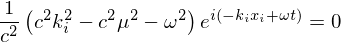

In [2]:
xi, ki, om, mu=\
symbols('x_i k_i omega mu',real=True)
h,m,c,t = symbols('hbar m c t', real=True,\
                  positive=True,polar=True)
psi = exp(-I*(ki*xi-om*t))
laplace = Derivative(psi,xi,xi)
eq = Equality((1/c**2)*Derivative(psi,t,t)-\
              laplace - mu**2*psi).doit()
condition = simplify(factor(eq))
condition

De la anterior celda entendemos que
$$k^2 - \frac{\omega^2}{c^2} + \frac{m^2c^2}{\hbar^2}=0$$
Esta expresión es equivalente a
$$p^2c^2 + m^2c^4 = E^2,$$
es decir, la relación momento-energía relativista debe satisfacerse para que $\psi = \exp(-i(k_ix_i-\omega t))$ sea solución. Más generalmente una combinación de funciones de este tipo para todo $k$ formará el campo de Klein-Gordon que posteriormente se utilizará para describir partículas de spin 0.

Es además claro que fue necesario tomar $p=\hbar k$ y $E=\hbar \omega$.


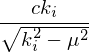

In [3]:
disp_rel =simplify(solve(condition,om)[-1])[0]
group_v = simplify(diff(expand(disp_rel),ki))
group_v



Entonces, la velocidad de grupo es $$v_g = \frac{ck}{\sqrt{k^2-\mu^2}} = \frac{ck}{\omega}.$$ Por otro lado, la velocidad de fase es $$v_p = \frac{\omega}{k}.$$


PS. El problema hubiera sido más sencillo recordando las condiciones de primera cuantización:
$$E \rightarrow \sim\frac{\partial}{\partial t}$$
$$p \rightarrow \sim -\hbar\nabla.$$
De hecho, la ecuación de KG es el primer acercamiento a ecuaciones de onda relativistas y viene de, precisamente, realizar "primera cuantización" en la relación energía-momentum relativista.

## Problema 2.3

Tenemos la representación de momentum $$\langle p | \psi\rangle = \varphi(p) = \frac{1}{(\pi\sigma^2\hbar^2)^{1/4}} \exp\left(-\frac{(p-p_0)^2}{2\sigma^2\hbar^2}\right).$$

Para obtener la representación de posición $\langle x | \psi\rangle = \phi(x)$ tomamos la transformada de Fourier, para evitar ambiguedades la definimos de la forma usual:

$$ \phi(x) = \int_{-\infty}^{\infty}\varphi(p=\hbar k=2\pi\hbar\nu)\exp(2\pi i\nu x)d\nu.\ 2\pi\nu = k.$$
Con esta formulación de la transformada no se tiene unitareidad, por lo que es necesario volver a normalizarla.

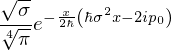

In [4]:
p, p0,nu,x,k = symbols('p p_0 nu x k',\
                       real=True)
s = Symbol('sigma', real=True, \
           positive=True)
mom_repr = nsimplify(1./(pi*s**2*h**2)**(1./4)\
                     * exp(-(p-p0)**2/(2*s**2*h**2)))
mom_repr
pos_repr = \
inverse_fourier_transform(mom_repr.subs(p, \
                                        2*pi*nu*h), nu,x)
norm = \
simplify(integrate(pos_repr*conjugate(pos_repr),\
                   (x,-oo,oo),conds='none'))
pos_repr*=1/sqrt(norm)
simplify(pos_repr)

Ahora se debe calcular la varianza de la variable $\lambda = x ,p$ según
$$\Delta\lambda^2 = \int\lambda^2|\phi(\lambda)|^2d\lambda$$
y comprobar que $$\Delta x\Delta p = \frac{\hbar}{2}.$$

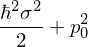

In [5]:
delta_p_sq = integrate(p**2 * mom_repr*\
                       conjugate(mom_repr),\
                       (p,-oo,oo),conds='none')
re(delta_p_sq)

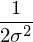

In [6]:
delta_x_sq = integrate(x**2 * pos_repr*\
                       conjugate(pos_repr),\
                       (x,-oo,oo),conds='none')
re(delta_x_sq)

In [7]:
simplify(Abs(delta_p_sq.subs(p0,0)*delta_x_sq))

Entonces, vemos que el paquete de onda gaussiano cumple con la relación de incertidumbre.


Ahora bien, para la siguiente parte debemos hacer que el estado $|\psi\rangle$ evolucione en el tiempo, para lo cual debemos, como es usual, aplicar el operador de evolución temporal, definido como $U(t) = \exp(-iHt/\hbar)$, siendo $H=\frac{p^2}{2m}$ el hamiltoniano. Ya que estamos en representación de momentum (inicialmente), y tratamos partículas libres. Tenemos que el paquete de onda en un tiempo $t$ será
$$\varphi(p,t)=U(t)\varphi(p)=\exp\left(-i\frac{p^2t}{2m\hbar}\right)\varphi(p)$$

In [8]:
mom_repr = \
nsimplify(simplify(exp(-I*p**2*t/(2*m*h))\
                   *1./(pi*s**2*h**2)**(1./4)\
                   * exp(-(p-p0)**2/(2*s**2*h**2))))
mom_repr
pos_repr = \
inverse_fourier_transform(mom_repr.subs(p,\
                                        2*pi*nu*h), \
                          nu,x, noconds=True)
re(conjugate(pos_repr)*pos_repr)
norm = \
simplify(integrate(re(conjugate(pos_repr)\
                      *pos_repr),(x,-oo,oo),conds='none'))
#simplify(Abs(norm))
pos_repr*=1/sqrt(norm)
pos_repr=simplify(cancel(pos_repr))


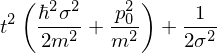

In [9]:
delta_x_sq = \
integrate(x**2 * re(cancel(pos_repr\
                           *conjugate(pos_repr))),\
          (x,-oo,oo),conds='none')
collect(simplify(delta_x_sq),t)

De esta forma vemos que se obtiene la expresión deseada (si tomamos $p_0=0$. En general tenemos
$$\Delta x^2(t) = t^2\left(\frac{\hbar^2\sigma^2}{2m^2} + \frac{p_0^2}{m^2}\right) + \frac{1}{2\sigma^2}.$$ Que era lo que se quería demostrar.